# Lab Work 1 
## House Pricing Prediction using Regression

 #### 1.Create virtual envinroment for this project
 - Run this command : **python3 -m venv <name_of_virtualenv>**

 #### 2.Install all necessary libraries
 - Run these commands : 
   - **pip install numpy**
   - **pip install pandas**
   - **pip install matplotlib** 
   - **pip install -U scikit-learn**


   In this lab work assignment, your task is to develop a program that utilizes your knowledge of 
regression techniques to predict house prices based on the given features. You will need to 
analyze the dataset, preprocess the data, train, and evaluate different regression models, and 
compare their performance. The dataset for this task is provided, named **‘House Pricing.csv’**. 


##### 1.Data Analysis

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#load data into Panda's dataframe
df = pd.read_csv('../dataset/House Pricing.csv')

#print the first 5 rows of the dataframe
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement   
0  13300000  7420         4          2        3      yes        no       no  \
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


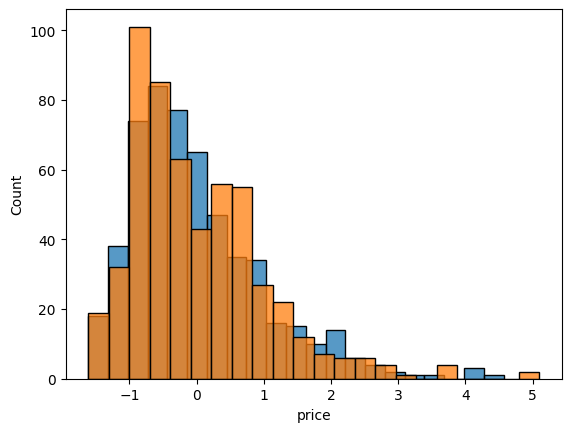

In [11]:
#Visualize the distribution of the features(numerical) using histogram
print(sns.histplot(df['price']))
print(sns.histplot(df['area']))
# sns.histplot(df['bedrooms'])
# sns.histplot(df['bathrooms'])
# sns.histplot(df['stories'])
# sns.histplot(df['parking'])

<Axes: xlabel='furnishingstatus', ylabel='count'>

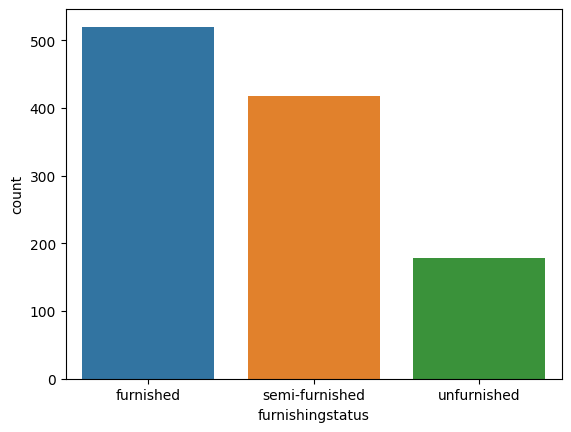

In [5]:
#Visualize the frequency of the features(categorical) using bar chart
sns.countplot(x='mainroad', data=df)
sns.countplot(x='guestroom', data=df)
sns.countplot(x='basement', data=df)
sns.countplot(x='hotwaterheating', data=df)
sns.countplot(x='airconditioning', data=df)
sns.countplot(x='prefarea', data=df)
sns.countplot(x='furnishingstatus', data=df)

<Axes: xlabel='furnishingstatus', ylabel='price'>

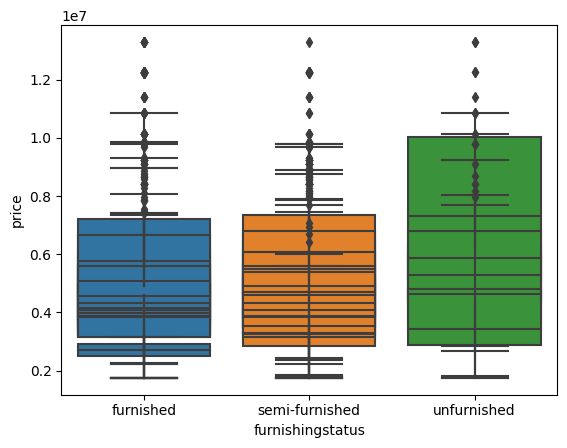

In [6]:
# relate between the features and price
sns.scatterplot(x='area', y='price', data=df)
sns.boxplot(x='bedrooms', y='price', data=df)
sns.boxplot(x='bathrooms', y='price', data=df)
sns.boxplot(x='stories', y='price', data=df)
sns.boxplot(x='mainroad', y='price', data=df)
sns.boxplot(x='guestroom', y='price', data=df)
sns.boxplot(x='basement', y='price', data=df)
sns.boxplot(x='hotwaterheating', y='price', data=df)
sns.boxplot(x='airconditioning', y='price', data=df)
sns.boxplot(x='parking', y='price', data=df)
sns.boxplot(x='prefarea', y='price', data=df)
sns.boxplot(x='furnishingstatus', y='price', data=df)

#### 2.Data Preprocessing

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [8]:
# Load the dataset
df = pd.read_csv('../dataset/House Pricing.csv')

# Check for missing values
print("--------------------")
print("Missing values:")
print(df.isnull().sum())
print("--------------------")

# Convert categorical variables into dummy variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)

# Replace categorical columns with encoded columns
df = pd.concat([df.drop(categorical_cols, axis=1), encoded_cols], axis=1)

# Scale numerical features
scaler = StandardScaler()
num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Split the dataset into training and testing sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=42)

# Verify the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

--------------------
Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
--------------------
Training set shape: (528, 13) (528,)
Testing set shape: (17, 13) (17,)


d:\OneDrive - Universiti Malaya\Sem 2\WIA1006 Machine Learning\Lab Assignment 1\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


3.Regression Model Development

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
lr_model = LinearRegression()

# Train the model on the training dataset
lr_model.fit(X_train, y_train)

# Use the model to make predictions on the testing dataset
y_pred = lr_model.predict(X_test)

# Evaluate the model using mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Evaluate the model using R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R-squared (coefficient of determination): {:.2f}".format(r2))

Mean Squared Error: 0.35
Root Mean Squared Error: 0.59
R-squared (coefficient of determination): 0.69


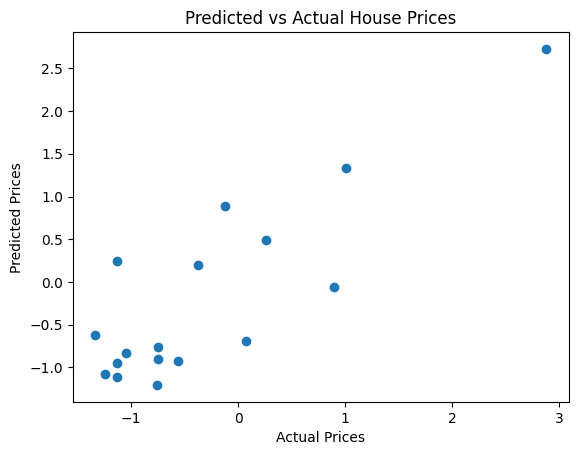

Accuracy of the model: 68.91%


In [10]:
import matplotlib.pyplot as plt

# Plot predicted vs actual house prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.show()

# Print the accuracy of the model
print("Accuracy of the model: {:.2f}%".format(lr_model.score(X_test, y_test)*100))
